In [ ]:
# loading library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **LOAD DATA FROM CSV FILE**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/data set/Tugas Akhir/dataukmbaru.csv",encoding = "ISO-8859-1")
df.head()

Nama_UKM  ... Luas Tempat Usaha
0     Shabrina Fashion  ...              80m2
1  Sukaesih Collection  ...              30m2
2         PK. Warsilah  ...              50m2
3    CV. Meubel Berkah  ...              60m2
4           CV. Erries  ...              30m2

[5 rows x 28 columns]

In [ ]:
#data yang diambil untuk nilai x 
#1.Omzet
#2.Asset
#3.Jml Modal Luar
#4.Jml Modal Sendiri

# untuk data Y = Jenis Usaha

variable_tetap = ['Jenis_Usaha']
feature = ['Omzet','Asset','Modal_Sendiri','Modal_Luar']

x = df[feature]
y = df[variable_tetap]

# ***Data Visualization and Anylisis***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12508 entries, 0 to 12507
Data columns (total 28 columns):
Nama_UKM                                     9032 non-null object
Nama_Pemilik                                 12502 non-null object
NAMA IZIN USAHA                              12502 non-null object
NPWP                                         12508 non-null object
TANGGAL MULAI USAHA
(mmddyyyy)
(12311998)    12328 non-null object
ALAMAT LENGKAP                               12495 non-null object
RT                                           12508 non-null object
RW                                           12508 non-null int64
KELURAHAN                                    12507 non-null object
KECAMATAN                                    12508 non-null object
KOTA                                         12492 non-null object
PROVINSI                                     12508 non-null object
KODE POST                                    12508 non-null object
No_hp                 

In [ ]:
df.shape

(12508, 28)

In [ ]:
df.describe()

RW    TAHUN DATA  ...    Modal_Luar   Jenis_Usaha
count  12508.000000  12508.000000  ...  1.250800e+04  12508.000000
mean       0.304285   2017.998561  ...  4.605053e+03      1.295091
std        1.679194      4.469328  ...  1.708170e+05      0.576576
min        0.000000   1905.000000  ...  0.000000e+00      1.000000
25%        0.000000   2019.000000  ...  0.000000e+00      1.000000
50%        0.000000   2019.000000  ...  0.000000e+00      1.000000
75%        0.000000   2019.000000  ...  0.000000e+00      1.000000
max      101.000000   2019.000000  ...  1.500000e+07      3.000000

[8 rows x 8 columns]

In [ ]:
df['Jenis_Usaha'].value_counts()

1    9595
2    2135
3     778
Name: Jenis_Usaha, dtype: int64

In [ ]:
df.hist(column='Jenis_Usaha', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6393fa8160>]],
      dtype=object)

In [ ]:
df.index.values

array([    0,     1,     2, ..., 12505, 12506, 12507])

# ***FEATURE SET***

In [ ]:
df.columns

Index(['Nama_UKM', 'Nama_Pemilik', 'NAMA IZIN USAHA', 'NPWP',
       'TANGGAL MULAI USAHA\n(mmddyyyy)\n(12311998)', 'ALAMAT LENGKAP', 'RT',
       'RW', 'KELURAHAN', 'KECAMATAN', 'KOTA', 'PROVINSI', 'KODE POST',
       'No_hp', 'EMAIL', 'WEBSITE', 'BENTUK USAHA', 'SEKTOR USAHA', 'Produksi',
       'TAHUN DATA', 'Pekerja', 'Omzet', 'Asset', 'Modal_Sendiri',
       'Modal_Luar', 'Jenis_Usaha', 'SUMBER \nDATA/NAMA PENDATA',
       'Luas Tempat Usaha'],
      dtype='object')

In [ ]:
df.Jenis_Usaha

0        1
1        1
2        1
3        1
4        1
        ..
12503    2
12504    2
12505    2
12506    2
12507    3
Name: Jenis_Usaha, Length: 12508, dtype: int64

In [ ]:
df['Jenis_Usaha'].value_counts().sort_values()

3     778
2    2135
1    9595
Name: Jenis_Usaha, dtype: int64

In [ ]:
df[['Omzet','Modal_Sendiri','Modal_Luar','Jenis_Usaha']]

Omzet  Modal_Sendiri  Modal_Luar  Jenis_Usaha
0      145000000       50000000           0            1
1       15000000       75000000           0            1
2       12000000        5000000           0            1
3      144000000       50000000           0            1
4       72000000       20000000           0            1
...          ...            ...         ...          ...
12503  100000000       30000000           0            2
12504  100000000       30000000           0            2
12505  100000000       30000000           0            2
12506  200000000       50000000           0            2
12507  350000000       50000000           0            3

[12508 rows x 4 columns]

In [ ]:
df.head()

Nama_UKM  ... Luas Tempat Usaha
0     Shabrina Fashion  ...              80m2
1  Sukaesih Collection  ...              30m2
2         PK. Warsilah  ...              50m2
3    CV. Meubel Berkah  ...              60m2
4           CV. Erries  ...              30m2

[5 rows x 28 columns]

# ***NORMALIZE DATA***

In [ ]:
X_train = pd.get_dummies(df[['Omzet','Asset','Modal_Sendiri','Modal_Luar']])
y_train = pd.DataFrame(df['Jenis_Usaha'])

In [ ]:
print(X_train.info())
print(X_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12508 entries, 0 to 12507
Data columns (total 4 columns):
Omzet            12508 non-null int64
Asset            12508 non-null int64
Modal_Sendiri    12508 non-null int64
Modal_Luar       12508 non-null int64
dtypes: int64(4)
memory usage: 391.0 KB
None
       Omzet     Asset  Modal_Sendiri  Modal_Luar
0  145000000  18000000       50000000           0
1   15000000  10000000       75000000           0
2   12000000   7500000        5000000           0
3  144000000  85000000       50000000           0
4   72000000  42500000       20000000           0


In [ ]:
X = np.array(df.ix[:, 0:4]) 	  # end index is exclusive
y = np.array(df['Jenis_Usaha']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_train, y, test_size=0.2, random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (10006, 4) (10006,)
Test set: (2502, 4) (2502,)


# ***TRAINING AND MAKING PREDICTIONS***

## **K-Nearest Neighbor (K-NN)**

Import Library

In [1]:
#Import Library of KNN model
from sklearn.neighbors import KNeighborsClassifier

Training

In [2]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

NameError: ignored

# Accuracy Evaluation

Predicting

In [ ]:
k=6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:50]

array([3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
#Menghitung Array

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yhat))

[[1949   14    2]
 [ 131  244    4]
 [  11    7  140]]


In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.93      0.99      0.96      1965
           2       0.92      0.64      0.76       379
           3       0.96      0.89      0.92       158

    accuracy                           0.93      2502
   macro avg       0.94      0.84      0.88      2502
weighted avg       0.93      0.93      0.93      2502



In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9306416150309814
Test set Accuracy:  0.9324540367705836


# ***Plot model accuracy for Different number of Neighbors***

Bagaimana dengan K lainnya?
K di KNN, adalah jumlah tetangga terdekat untuk diperiksa. Seharusnya ditentukan oleh Pengguna. Jadi, bagaimana kita memilih K yang benar? Solusi umum adalah memesan sebagian data Anda untuk menguji keakuratan model. Kemudian pilih k = 1, gunakan bagian pelatihan untuk pemodelan, dan hitung akurasi prediksi menggunakan semua sampel dalam set tes Anda. Ulangi proses ini, tambah k, dan lihat k mana yang terbaik untuk model Anda.

Kita dapat menghitung akurasi KNN untuk Ks yang berbeda.

In [ ]:
Ks = 5
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y =neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y)

    
    std_acc[n-1]=np.std(y==y_test)/np.sqrt(y.shape[0])

mean_acc

array([0.93605116, 0.93165468, 0.93445244, 0.93405276])

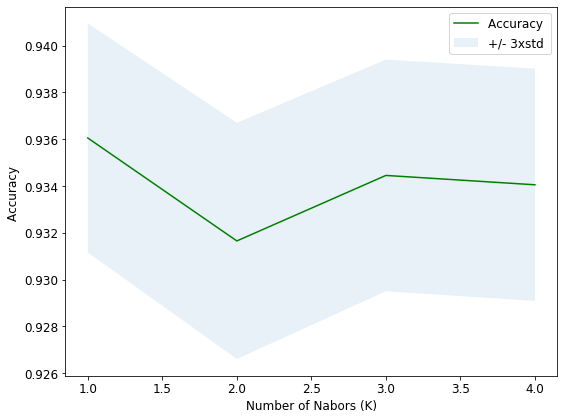

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9360511590727418 with k= 1
